In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [9]:
def parser(s):
    return datetime.strptime(s,"%Y-%m-%d")

In [10]:
def perform_adf(data):
    res = adfuller(data)
    print("ADF Statistic:",res[0])
    print("P Value:",res[1])

In [36]:
df = pd.read_csv("catfish.csv",parse_dates=[0],index_col=0,date_parser=parser).squeeze()

C:\Users\ELmohannd\AppData\Local\Temp\ipykernel_12292\4041818755.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv("catfish.csv",parse_dates=[0],index_col=0,date_parser=parser).squeeze()


In [37]:
df = df.loc[datetime(2004,1,1):]

In [38]:
df

Date
2004-01-01    27140
2004-02-01    28526
2004-03-01    28845
2004-04-01    25033
2004-05-01    24764
              ...  
2012-08-01    14442
2012-09-01    13422
2012-10-01    13795
2012-11-01    13352
2012-12-01    12716
Name: Total, Length: 108, dtype: int64

In [39]:
df.diff()

Date
2004-01-01       NaN
2004-02-01    1386.0
2004-03-01     319.0
2004-04-01   -3812.0
2004-05-01    -269.0
               ...  
2012-08-01    1166.0
2012-09-01   -1020.0
2012-10-01     373.0
2012-11-01    -443.0
2012-12-01    -636.0
Name: Total, Length: 108, dtype: float64

In [40]:
df = df.diff().diff().dropna()

<Axes: xlabel='Date'>

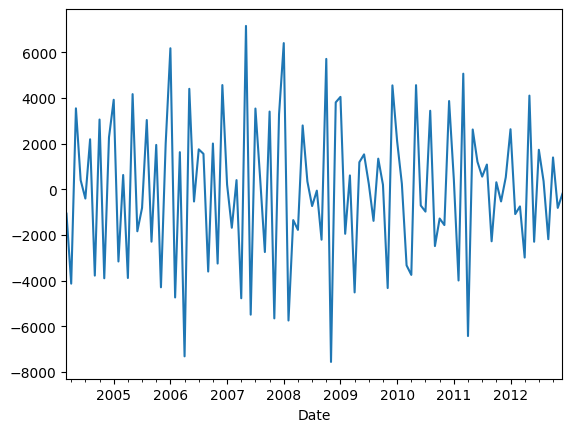

In [41]:
df.plot()

In [42]:
perform_adf(df)

ADF Statistic: -7.162321332721407
P Value: 2.946209595689129e-10


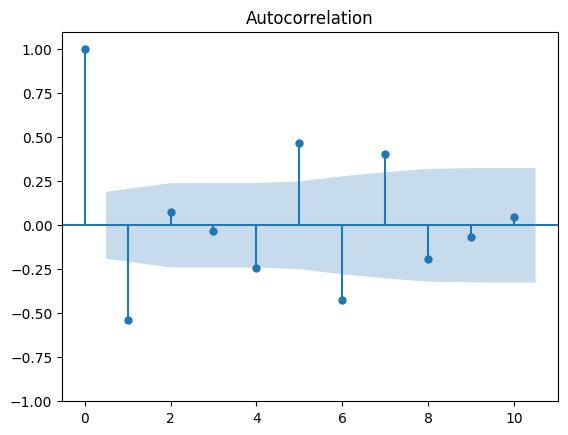

In [49]:
plot_acf(df,lags=10)
plt.ylim(-1,1.1)
plt.show()

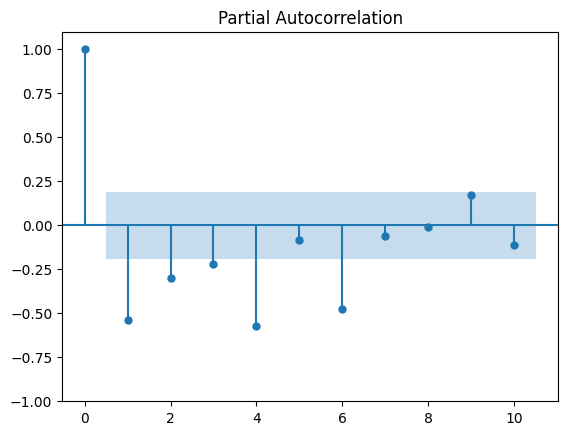

In [50]:
plot_pacf(df,lags=10)
plt.ylim(-1,1.1)
plt.show()

C:\Users\ELmohannd\anaconda3\envs\pandas_playground\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


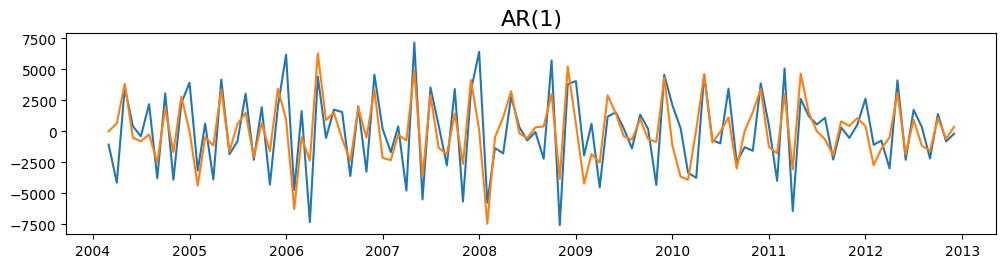

C:\Users\ELmohannd\anaconda3\envs\pandas_playground\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ELmohannd\anaconda3\envs\pandas_playground\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


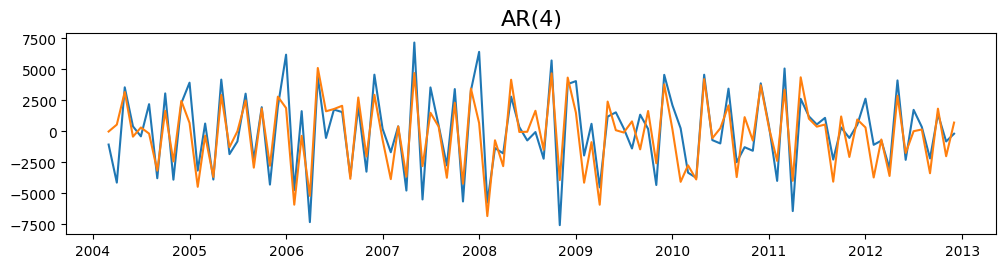

C:\Users\ELmohannd\anaconda3\envs\pandas_playground\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ELmohannd\anaconda3\envs\pandas_playground\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


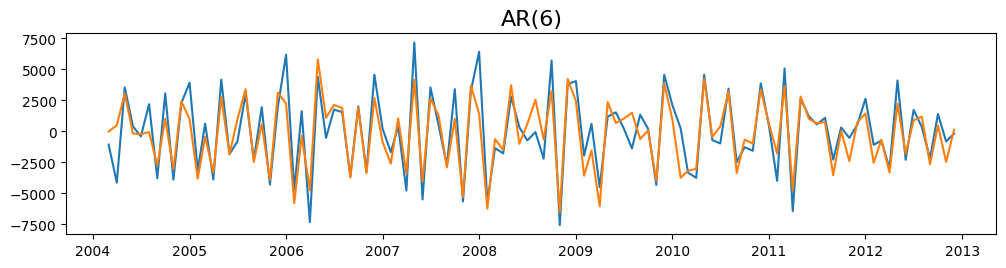

C:\Users\ELmohannd\anaconda3\envs\pandas_playground\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ELmohannd\anaconda3\envs\pandas_playground\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ELmohannd\anaconda3\envs\pandas_playground\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


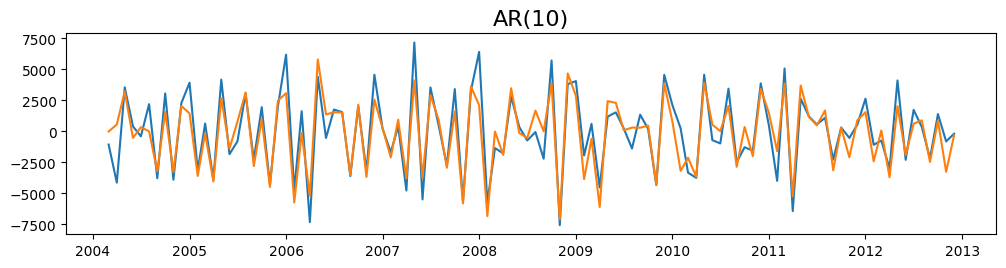

In [55]:
lag = [1,4,6,10]
model = {}
for i,x in enumerate(lag):
    plt.figure(figsize=(12,12))
    ar_model = ARIMA(df,order=(x,0,x))
    fitted_model = ar_model.fit()
    model[x] = fitted_model
    plt.subplot(4,1,i+1)
    plt.plot(df)
    plt.plot(fitted_model.fittedvalues)
    plt.title("AR(%s)"%x,fontsize=16)
    plt.show()

In [61]:
for x in lag:
    print("AIC for AR(%s): %s"%(x,model[x].aic))

AIC for AR(1): 1925.1019194594558
AIC for AR(4): 1896.6488506503656
AIC for AR(6): 1881.0261519760093
AIC for AR(10): 1872.8264474606929


In [62]:
for x in lag:
    print("BIC for AR(%s): %s"%(x,model[x].bic))

BIC for AR(1): 1935.755675835904
BIC for AR(4): 1923.2832415914863
BIC for AR(6): 1918.3142992935782
BIC for AR(10): 1931.4221075311584
